          id first_name last_name                       email  \
0  644557903      Monet  Santiago  macroprism1987@outlook.com   
1  780786739      Thora    Conrad         alist1924@yahoo.com   
2  222908099   Jermaine   Kaufman             chmotra3@live.c   
3  233593354     Edmund      Hunt         prune1819@yahoo.com   
4  991555588     Ismael     Berry         batch1969@yahoo.com   

                  timestamp   age  gender   q1   q2   q3    q4   q5  
0 2021-07-21 07:26:07+00:00   NaN    Male  7.9  3.6  1.0   9.2  1.3  
1 2022-08-03 11:31:58+00:00  63.0    Male  NaN  8.4  0.1  10.0  2.6  
2 2007-10-03 18:41:06+00:00  37.0  Female  9.3  7.9  5.4   7.8  5.5  
3 2002-10-12 08:10:04+00:00  30.0   Other  8.7  8.5  NaN   5.0  0.8  
4 2030-03-30 12:55:47+00:00  23.0  Female  9.7  7.3  6.5   4.7  5.9  


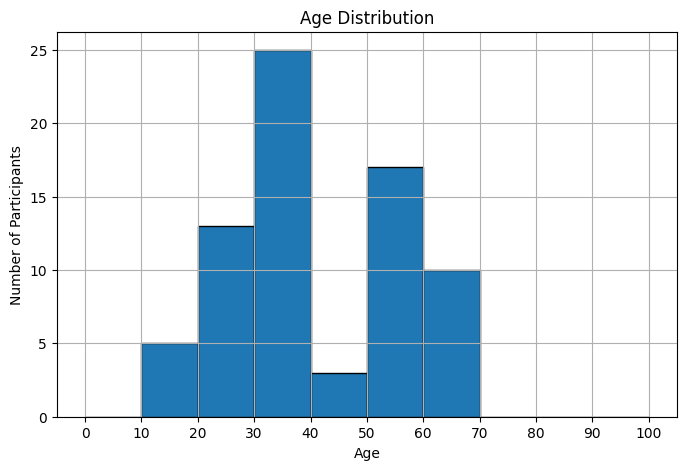

['macroprism1987@outlook.com', 'alist1924@yahoo.com', 'chmotra3@live.c', 'prune1819@yahoo.com', 'batch1969@yahoo.com', 'earlier1943@live.com', 'welcome1819@live.com', 'sines1828@outlook.com', 'crtie37c', 'humanitarianism1810@yandex.com', 'kapp1842@live.com', 'donal1881@yahoo.com', 'repuledndex.c', 'picoline1893@outlook.com', 'lashorn1849@yandex.com', 'decubitus1921@live.com', 'carburator1904@yandex.com', 'urinaries1918@outlook.com', 'prefavorably1867@outlook.com', 'maidhoods2029@yandex.com', 'bellboy1896@outlook.com', 'alien1889@gmail.com', 'breathless1814@live.com', 'gripy1840@outlook.com', 'apartness1957@live.com', 'neutrologistic1838@gmail.com', 'acceptable1879@yandex.com', 'aggregations1977@yandex.com', 'agosto1883@yandex.com', 'uppercutted1855@yahoo.com', 'pueleneyandex.c', 'metalsmith2054@gmail.com', 'dupree1882@yandex.com', 'unmentionability1827@live.com', 'unexpensive2046@yandex.com', 'chist19ook.c', 'dazing1913@live.com', 'continuingly1862@live.com', 'palaearctic1902@gmail.com

In [8]:
from hw5 import *
import pandas as pd
import pathlib
import numpy as np
from typing import Union, Tuple


qa = QuestionnaireAnalysis("C:/Users/GaiaNegev/Projects/hw5-2025/data.json")
qa.read_data()


qa.show_age_distrib()

qa.remove_rows_without_mail()

unique_email = qa.print_all_emails()
print(unique_email)

In [11]:
maximal_nans_per_sub = 1

df = qa.remove_rows_without_mail()  # work on a copy to avoid modifying original

# Count NaNs per row (per participant)
n_nans = df.isna().sum(axis=1)

# Select only question columns (assumes they start with 'q')
question_cols = [col for col in df.columns if col.startswith("q")]

# Work only on question columns
n_nans = df[question_cols].isna().sum(axis=1)
mean_scores = df[question_cols].mean(axis=1, skipna=True)

# Calculate row-wise mean ignoring NaNs
# Calculate row-wise mean only on question columns
mean_scores = df[question_cols].mean(axis=1, skipna=True)

# If number of NaNs > maximal_nans_per_sub, assign NaN, else floor the mean
score = mean_scores.where(n_nans <= maximal_nans_per_sub, other=np.nan)

# Floor the scores (only non-NaN values)
score = score.apply(lambda x: np.floor(x) if pd.notna(x) else x)

# Create the score series with same index as df, fill NaNs for invalid rows
full_score = pd.Series(data=np.nan, index=df.index, dtype="float")
full_score.loc[score.index] = score

# Convert to UInt8, allowing NaNs (nullable unsigned int)
full_score = full_score.astype("UInt8")

# Add "score" column
df["score"] = full_score

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load(r"C:\Users\GaiaNegev\Projects\hw5-2025\tests_data\q1_hist.npz")

print("Keys in npz file:", data.files)

# Let's say the key is 'arr_0' or something else
key = data.files[0]
img_array = data[key]

print("Shape of array:", img_array.shape)
print("Array dtype:", img_array.dtype)
print("Array contents (first 10 elements):", img_array[:10])


Keys in npz file: ['hist', 'edges']
Shape of array: (10,)
Array dtype: float64
Array contents (first 10 elements): [ 0.  5. 13. 25.  3. 17. 10.  0.  0.  0.]
